# About the Author

Hi there! I'm Martin Macchi, an aspiring data analyst with a passion for learning and growing in the world of data. Join me on this journey as I uncover insights and make data-driven decisions along the way!

# Our Dataset

Meat consumption is related to living standards, diet, livestock production and consumer prices, as well as macroeconomic uncertainty and shocks to GDP. Compared to other commodities, meat is characterised by high production costs and high output prices. Meat demand is associated with higher incomes and a shift - due to urbanisation - to food consumption changes that favour increased proteins from animal sources in diets. While the global meat industry provides food and a livelihood for billions of people, it also has significant environmental and health consequences for the planet.

This dataset was refreshed in 2018, with world meat projections up to 2026 are presented for beef and veal, pig, poultry, and sheep. Meat consumption is measured in thousand tonnes of carcass weight (except for poultry expressed as ready to cook weight) and in kilograms of retail weight per capita. Carcass weight to retail weight conversion factors are: 0.7 for beef and veal, 0.78 for pig meat, and 0.88 for both sheep meat and poultry meat. Excludes Iceland but includes all EU 28 member countries.

| Column          | Description                            |
|-----------------|----------------------------------------|
| LOCATION        | Country code name                      |
| SUBJECT         | Type of meat                           |
| TIME            | Year the data was recorded             |
| MEASURE         | Measure used to show the value         |
| VALUE           | The value, according to the measure    |

## Our Goals

* Identify top meat-consuming countries.
* Measure per capita consumption over time.
* Compare meat types.
* Analyze consumption trends per region.
* Detect structural changes.
* Build a Meat Consumption Index.
* Convert carcass weight to retail weight:

| Meat    | Conversion |
| ------- | ---------- |
| Beef    | 0.7        |
| Pig     | 0.78       |
| Sheep   | 0.88       |
| Poultry | 0.88       |



In [590]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

sns.set_theme(style="ticks")

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

#Importing Dataset
df = pd.read_csv(r'C:\Users\Martin\Desktop\Projects\Meat Consumption Worldwide\Data\meat_consumption_worldwide.csv')

## Dataset Overview

In [591]:
# Sampling dataframe
print(df.sample(10))

      LOCATION  SUBJECT     MEASURE  TIME       Value
13214      PRY      PIG  THND_TONNE  1995  130.000000
13114      DZA     BEEF  THND_TONNE  2006  198.000000
4197       PRY  POULTRY      KG_CAP  1995    6.284592
9194       KAZ    SHEEP  THND_TONNE  2005  107.000000
4398       PER    SHEEP      KG_CAP  2011    1.212370
10703      ARG      PIG  THND_TONNE  2001  228.557000
1999       CHN  POULTRY      KG_CAP  1997    7.080588
3739       MOZ      PIG      KG_CAP  2018    3.788687
8055       ZAF  POULTRY  THND_TONNE  1999  800.000000
9832       USA    SHEEP  THND_TONNE  2017  140.470355


In [592]:
# Extracting dataframe information
columns_info = []
for col in df.columns:
    columns_info.append({'Column_Name': col, 
                           'Data_Type': df[col].dtype, 
                           'NumUnique': df[col].nunique(), 
                           'Nulls': df[col].isnull().sum(), 
                           '%Null': ((df[col].isnull().sum()/len(df))*100).round(2), 
                           'Unique Sample': df[col].unique()
                          })
df_info = pd.DataFrame(columns_info)
df_info

,Column_Name,Data_Type,NumUnique,Nulls,%Null,Unique Sample
0,LOCATION,object,48,0,0.0,"[AUS, CAN, JPN, KOR, MEX, NZL, TUR, USA, DZA, ..."
1,SUBJECT,object,4,0,0.0,"[BEEF, PIG, POULTRY, SHEEP]"
2,MEASURE,object,2,0,0.0,"[KG_CAP, THND_TONNE]"
3,TIME,int64,37,0,0.0,"[1991, 1992, 1993, 1994, 1995, 1996, 1997, 199..."
4,Value,float64,11383,0,0.0,"[27.7218154779186, 26.199590974358102, 26.1690..."


## Data Cleaning and Standardization

In [593]:
# Converting Carcass Weights to Retail Weights
df.loc[df['SUBJECT'] == 'BEEF', 'Value'] *= 0.7
df.loc[df['SUBJECT'] == 'PIG', 'Value'] *= 0.78
df.loc[df['SUBJECT'] == 'POULTRY', 'Value'] *= 0.88
df.loc[df['SUBJECT'] == 'SHEEP', 'Value'] *= 0.88

# Converting Thousand Tonnes to Tonnes
df.loc[df['MEASURE'] == 'THND_TONNE', 'Value'] *= 1000
df.loc[df['MEASURE'] == 'THND_TONNE', 'MEASURE'] = 'TONNE'

#Renaming Columns
df = df.rename(columns={'LOCATION': 'COUNTRY_CODE', 'SUBJECT': 'TYPE', 'TIME': 'YEAR'})

#Checking duplicated values
df.duplicated().sum()

print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Number of duplicated values: {df.duplicated().sum()}")
print(f"Number of null values: {df_info['Nulls'].sum()}")


Number of rows: 13760
Number of columns: 5
Number of duplicated values: 0
Number of null values: 0


## Converting Dataframe from Long to Wide Format

In [594]:
#Pivoting Dataframe
df_wide = df.pivot(index=['COUNTRY_CODE', 'TYPE', 'YEAR'], columns='MEASURE', values='Value')
df_wide = df_wide.reset_index()
df_wide

MEASURE,COUNTRY_CODE,TYPE,YEAR,KG_CAP,TONNE
0,ARG,BEEF,1990,38.758994,1.812245e+06
1,ARG,BEEF,1991,36.146584,1.714067e+06
2,ARG,BEEF,1992,35.552426,1.709317e+06
3,ARG,BEEF,1993,36.025270,1.755507e+06
4,ARG,BEEF,1994,33.862663,1.671757e+06
...,...,...,...,...,...
7037,ZMB,SHEEP,2022,0.475792,1.083646e+04
7038,ZMB,SHEEP,2023,0.480487,1.127131e+04
7039,ZMB,SHEEP,2024,0.485561,1.173036e+04
7040,ZMB,SHEEP,2025,0.490979,1.221449e+04


## Investigating Regional Data
This section examines regional-level data to support informed decision-making regarding their inclusion in the final dataset.

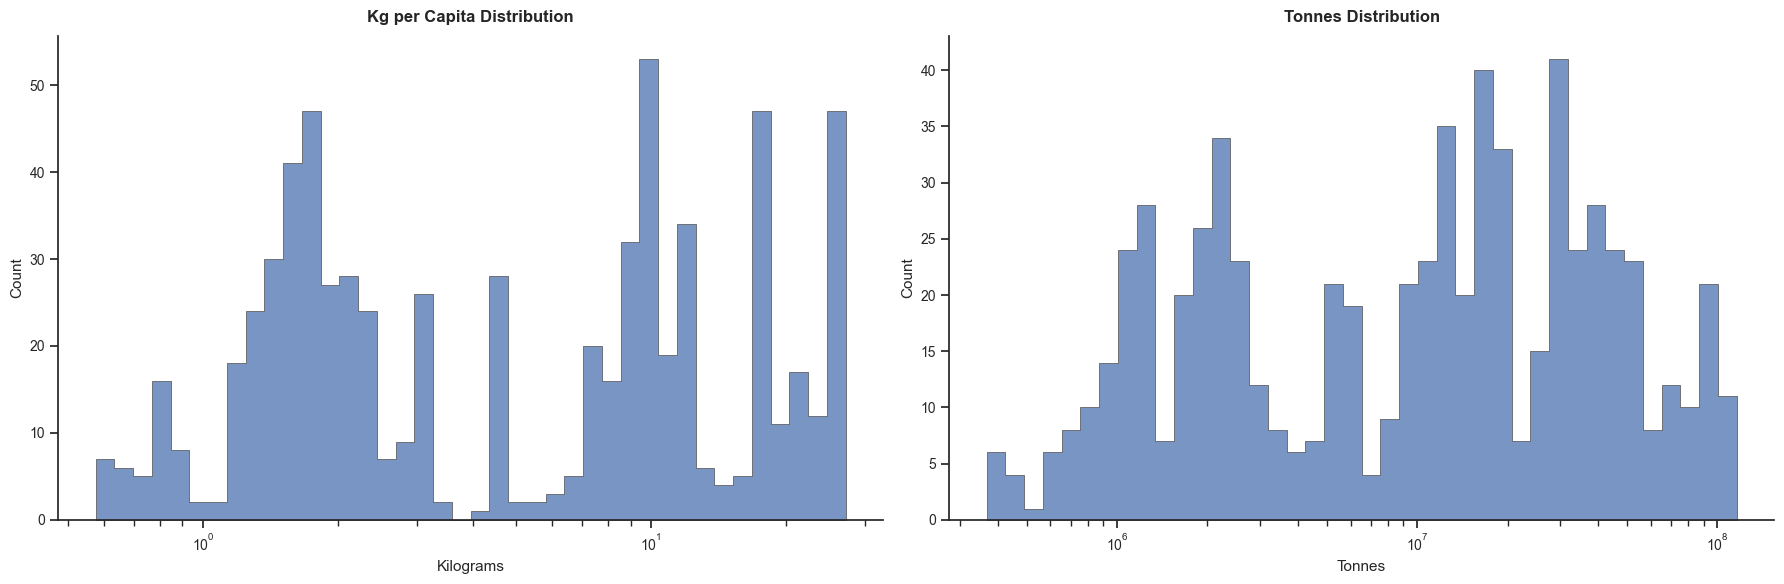

Regional aggregates (WLD, SSA, OECD, BRICS, EU28) were excluded from the dataset as they represent composite entities rather than independent observational units.
Their inclusion would introduce aggregation bias, reduce distributional variance, and violate unit-of-analysis consistency when combined with country-level data.
Consequently, these regional observations offer limited analytical value and risk distorting correlation and distributional analyses.


In [595]:
#Unique COUNTRY CODES
unique_codes = df['COUNTRY_CODE'].nunique()
region_codes = ['WLD', 'SSA', 'OECD', 'BRICS', 'EU28']
df_region = df_wide[df_wide['COUNTRY_CODE'].isin(region_codes)]

f, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(
    data=df_region, 
    x='KG_CAP',
    element="step", 
    bins=40, 
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
    ax=ax[0]
)

ax[0].set_title("Kg per Capita Distribution", fontsize=12, fontweight="bold", pad=10)
ax[0].set_xlabel("Kilograms", fontsize=11)
ax[0].set_ylabel("Count", fontsize=11)
ax[0].tick_params(axis='both', labelsize=10)

sns.histplot(
    df_region, 
    x='TONNE',
    element="step", 
    bins=40, 
    edgecolor=".3",
    linewidth=.5,
    log_scale=True, 
    ax=ax[1]
)

ax[1].set_title("Tonnes Distribution", fontsize=12, fontweight="bold", pad=10)
ax[1].set_xlabel("Tonnes", fontsize=11)
ax[1].set_ylabel("Count", fontsize=11)
ax[1].tick_params(axis='both', labelsize=10)

f.subplots_adjust(wspace=0.25)

sns.despine()
plt.tight_layout()
plt.show()

print("Regional aggregates (WLD, SSA, OECD, BRICS, EU28) were excluded from the dataset as they represent composite entities rather than independent observational units.\n" \
"Their inclusion would introduce aggregation bias, reduce distributional variance, and violate unit-of-analysis consistency when combined with country-level data.\n" \
"Consequently, these regional observations offer limited analytical value and risk distorting correlation and distributional analyses.")

## Filtering Country-Level Data

In [596]:
#Dropping REGION CODES

df_filtered = df_wide[~df_wide['COUNTRY_CODE'].isin(region_codes)]

print(f'Number of unique country codes with region codes: {unique_codes}')
print(f'Number of unique country codes without region codes:{df_filtered['COUNTRY_CODE'].nunique()}')

Number of unique country codes with region codes: 48
Number of unique country codes without region codes:43


## Descriptive Statistics

In [597]:
df_desc = df_wide.describe().style.background_gradient(cmap='viridis')
df_desc

print("The dataset comprises 7,042 observations spanning 1990–2026.\n" \
"Per-capita meat consumption and total consumption exhibit strong right-skewness, with median values substantially lower than their means, indicating that a small number of high-consuming countries drive overall averages.\n" \
"Total consumption shows extreme dispersion, ranging from negligible quantities to over 100 million tonnes, reflecting large structural differences in consumer scale.\n" \
"These characteristics suggest that median-based summaries and logarithmic transformations are more appropriate than raw means for analytical and modeling purposes.")

The dataset comprises 7,042 observations spanning 1990–2026.
Per-capita meat consumption and total consumption exhibit strong right-skewness, with median values substantially lower than their means, indicating that a small number of high-consuming countries drive overall averages.
Total consumption shows extreme dispersion, ranging from negligible quantities to over 100 million tonnes, reflecting large structural differences in consumer scale.
These characteristics suggest that median-based summaries and logarithmic transformations are more appropriate than raw means for analytical and modeling purposes.


## Distribution Analysis

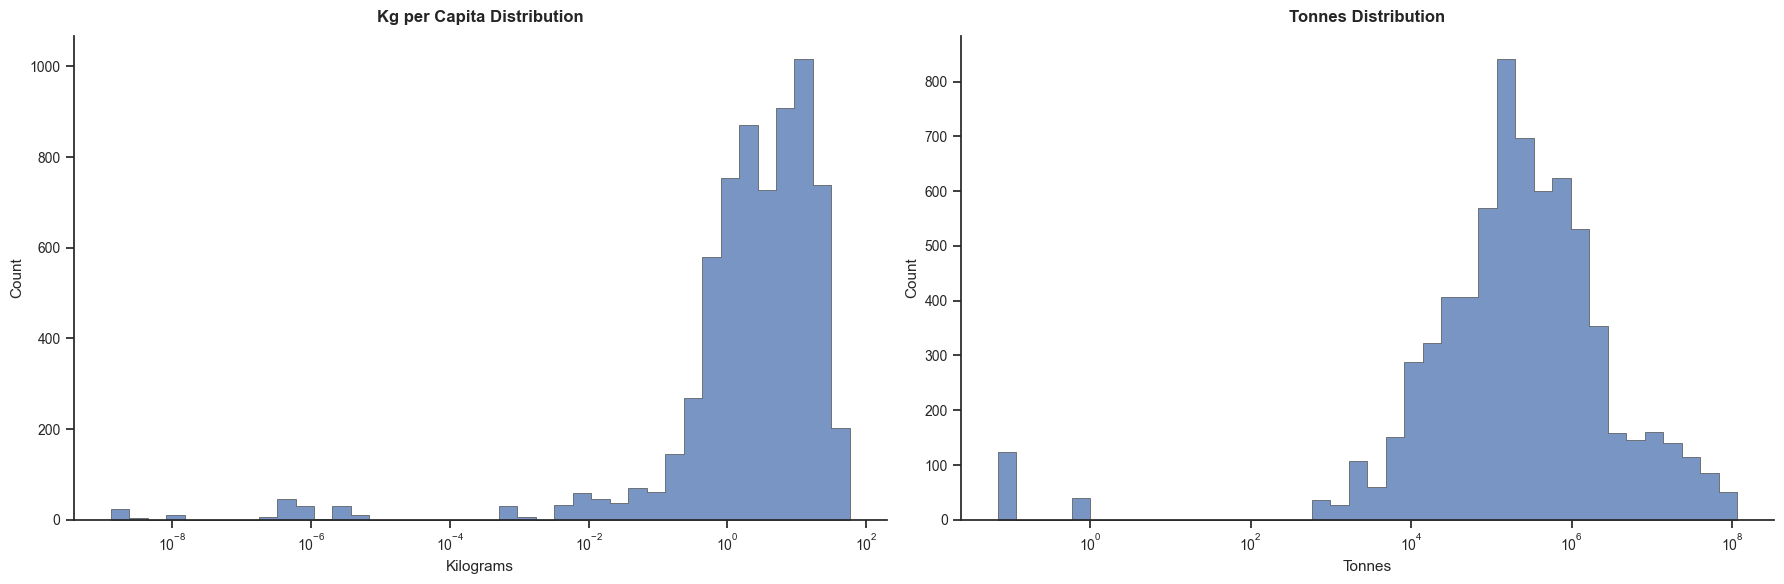

These distributions reveal that global meat consumption is highly unequal, with poultry being the most universally consumed meat, beef and pork showing strong regional concentration, and total consumption overwhelmingly driven by population size rather than per-capita dietary patterns.


In [598]:
# Exploring Distribution of Values
f, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(
    df_wide, 
    x='KG_CAP',
    element="step", 
    bins=40, 
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
    ax=ax[0]
)

ax[0].set_title("Kg per Capita Distribution", fontsize=12, fontweight="bold", pad=10)
ax[0].set_xlabel("Kilograms", fontsize=11)
ax[0].set_ylabel("Count", fontsize=11)
ax[0].tick_params(axis='both', labelsize=10)

sns.histplot(
    df_wide, 
    x='TONNE',
    element="step", 
    bins=40, 
    edgecolor=".3",
    linewidth=.5,
    log_scale=True, 
    ax=ax[1]
)

ax[1].set_title("Tonnes Distribution", fontsize=12, fontweight="bold", pad=10)
ax[1].set_xlabel("Tonnes", fontsize=11)
ax[1].set_ylabel("Count", fontsize=11)
ax[1].tick_params(axis='both', labelsize=10)

f.subplots_adjust(wspace=0.25)

sns.despine()
plt.tight_layout()
plt.show()

print('These distributions reveal that global meat consumption is highly unequal, with poultry being the most universally consumed meat, beef and pork showing strong regional concentration, and total consumption overwhelmingly driven by population size rather than per-capita dietary patterns.')

# Identifying the Top Meat-Consuming Countries
This section examines the countries with the highest average meat consumption—both in per-capita terms (kg/person) and total volume (tonnes)—over the period 1990 to 2026.

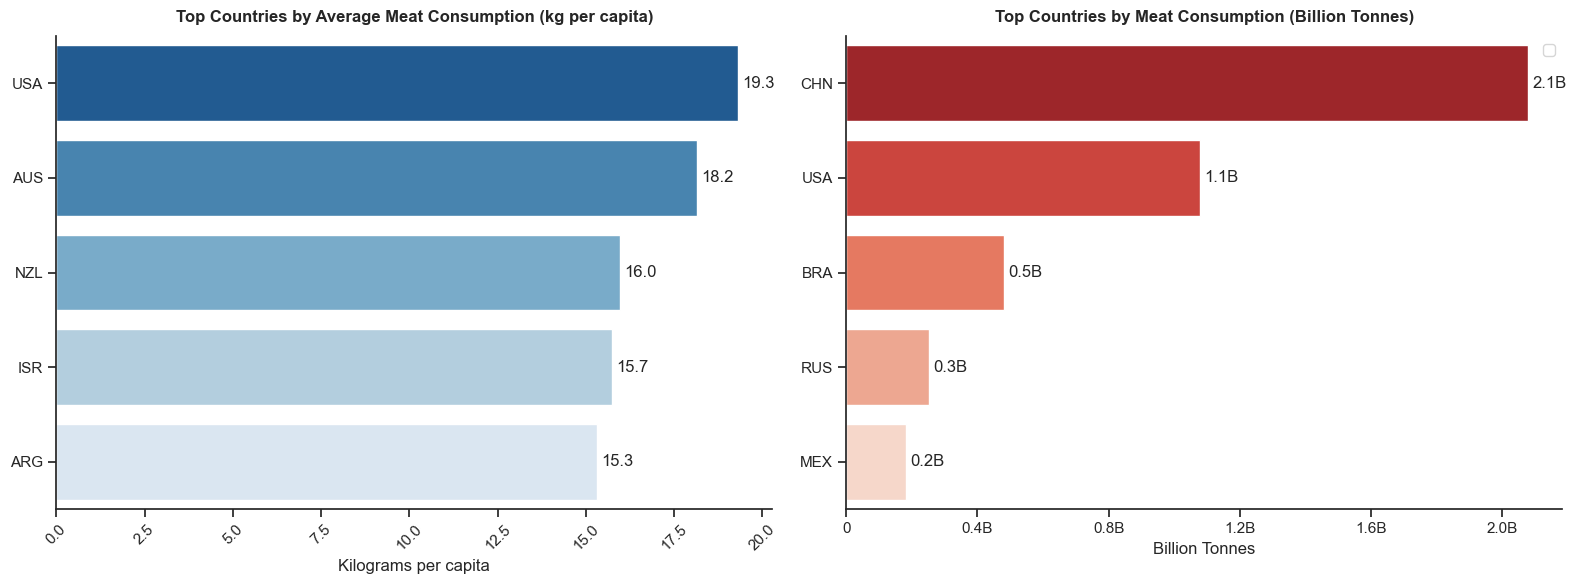

Between 1990 and 2026, USA recorded the highest average per-capita meat consumption.

Over the same period, CHN was the largest meat consumer in total volume.


In [599]:
kg_cap_top = df_filtered.groupby('COUNTRY_CODE')['KG_CAP'].mean().rename('KG_CAP').reset_index().sort_values(by='KG_CAP', ascending=False).nlargest(5, 'KG_CAP').set_index('COUNTRY_CODE')
df_tonne_top = df_filtered.groupby('COUNTRY_CODE')['TONNE'].sum().rename('TONNE').reset_index().sort_values(by='TONNE', ascending=False).nlargest(5, 'TONNE').set_index('COUNTRY_CODE')

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(
    kg_cap_top, 
    x='KG_CAP', 
    y='COUNTRY_CODE', 
    palette='Blues_r',
    ax=ax[0]
)

for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.1f', padding=3)

ax[0].set_title('Top Countries by Average Meat Consumption (kg per capita)', fontsize=12, fontweight="bold", pad=10)
ax[0].set_xlabel('Kilograms per capita')
ax[0].set_ylabel('')
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(
    df_tonne_top, 
    x='TONNE', 
    y='COUNTRY_CODE', 
    palette='Reds_r',
    ax=ax[1]
)

for container in ax[1].containers:
    labels = [f"{v.get_width()/1e9:.1f}B" for v in container]
    ax[1].bar_label(container, labels=labels, padding=3)

ax[1].xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax[1].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{x/1e9:.1f}B" if x != 0 else '0'))
ax[1].xaxis.set_major_locator(mticker.MaxNLocator(nbins=6))
ax[1].set_title('Top Countries by Meat Consumption (Billion Tonnes)', fontsize=12, fontweight="bold", pad=10)
ax[1].set_xlabel('Billion Tonnes')
ax[1].set_ylabel('')

f.subplots_adjust(wspace=0.25)

plt.legend()
plt.tight_layout()
sns.despine()
plt.show()

print(
    f"Between 1990 and 2026, {kg_cap_top.index[0]} recorded the highest average per-capita meat consumption.\n\n"
    f"Over the same period, {df_tonne_top.index[0]} was the largest meat consumer in total volume."
)

# Measuring Consumption Over Time
This section analyzes how per-capita meat consumption has evolved across years, highlighting long-term trends and shifts in dietary patterns.

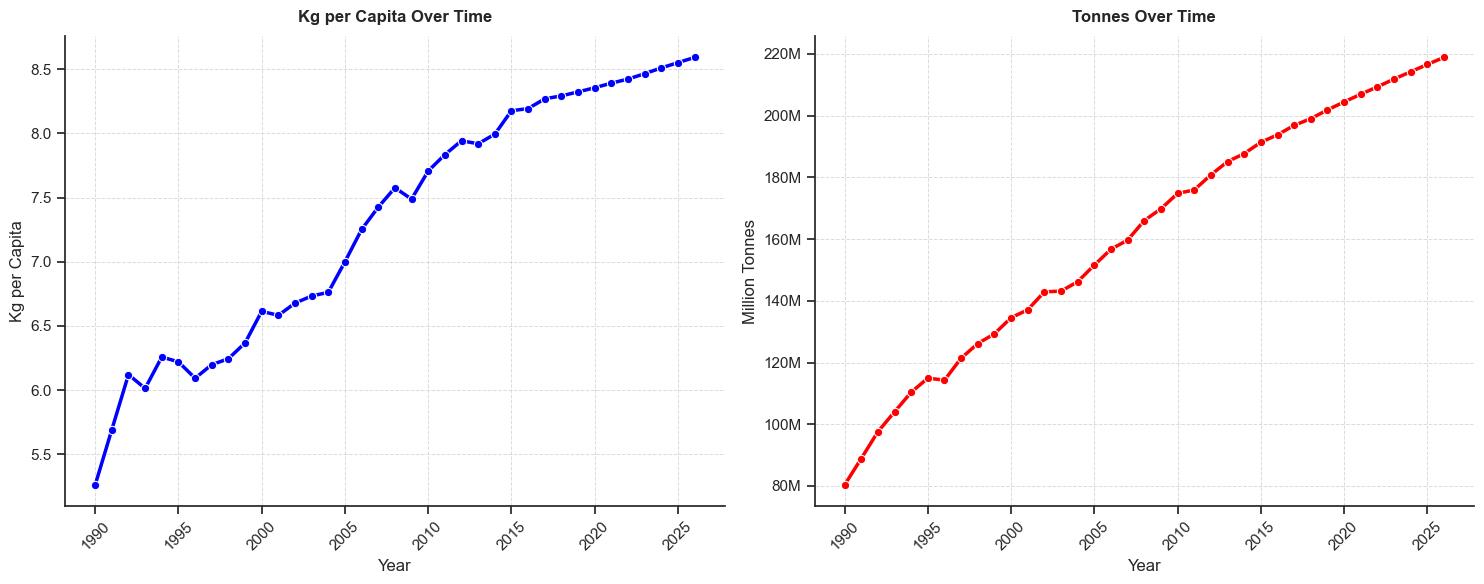

Global meat consumption has shown a consistent upward trend since 1990.

Per-capita intake increased from 5.3 kg to 8.6 kg, representing a 63.3% rise over the period. This indicates a steady global shift toward higher individual consumption levels.

Similarly, total global meat production expanded substantially. Annual output grew from approximately 80305344.1 million tonnes to 218869435.1 million tonnes, an overall increase of 172.5%. This reflects both rising population and increased demand.

Together, these trends highlight a long-term global intensification in meat consumption—both in terms of how much people eat and how much the world produces.


In [600]:
df_tonnes = df_filtered.groupby('YEAR')['TONNE'].sum().reset_index()
df_cap = df_filtered.groupby("YEAR")["KG_CAP"].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.lineplot(
    df_cap, 
    x='YEAR', 
    y='KG_CAP', 
    palette='flare', 
    linewidth=2.5, 
    marker='o', 
    color='blue',
    ci=None,
    ax=ax[0]
)

ax[0].set_title("Kg per Capita Over Time", fontsize=12, fontweight="bold", pad=10)
ax[0].set_xlabel('Year')
ax[0].set_ylabel("Kg per Capita")
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True, linestyle="--", linewidth=0.7, alpha=0.7)

sns.lineplot(
    df_tonnes, 
    x='YEAR', 
    y='TONNE', 
    palette='flare', 
    linewidth=2.5, 
    marker='o', 
    color='red',
    ci=None,
    ax=ax[1]
)

ax[1].set_title("Tonnes Over Time", fontsize=12, fontweight="bold", pad=10)
ax[1].set_xlabel('Year')
ax[1].set_ylabel("Million Tonnes")
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(True, linestyle="--", linewidth=0.7, alpha=0.7)
ax[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1e6:,.0f}M"))

f.subplots_adjust(wspace=0.25)

sns.despine()
plt.tight_layout()
plt.show()

min_avg = df_cap['KG_CAP'].min()
max_avg = df_cap['KG_CAP'].max()

min_ton = df_tonnes['TONNE'].min()
max_ton = df_tonnes['TONNE'].max()

print(f"Global meat consumption has shown a consistent upward trend since 1990.\n\n"
f"Per-capita intake increased from {min_avg:.1f} kg to {max_avg:.1f} kg, representing a {(max_avg/min_avg - 1) * 100:.1f}% rise over the period. This indicates a steady global shift toward higher individual consumption levels.\n\n"

f"Similarly, total global meat production expanded substantially. Annual output grew from approximately {min_ton:.1f} million tonnes to {max_ton:.1f} million tonnes, an overall increase of {(max_ton/min_ton - 1)*100:.1f}%. This reflects both rising population and increased demand.\n\n"

f"Together, these trends highlight a long-term global intensification in meat consumption—both in terms of how much people eat and how much the world produces.")

# Comparing Meat Types
This section compares global consumption patterns across different meat categories, using total volume (thousand tonnes) to highlight the relative scale and trends of each type.

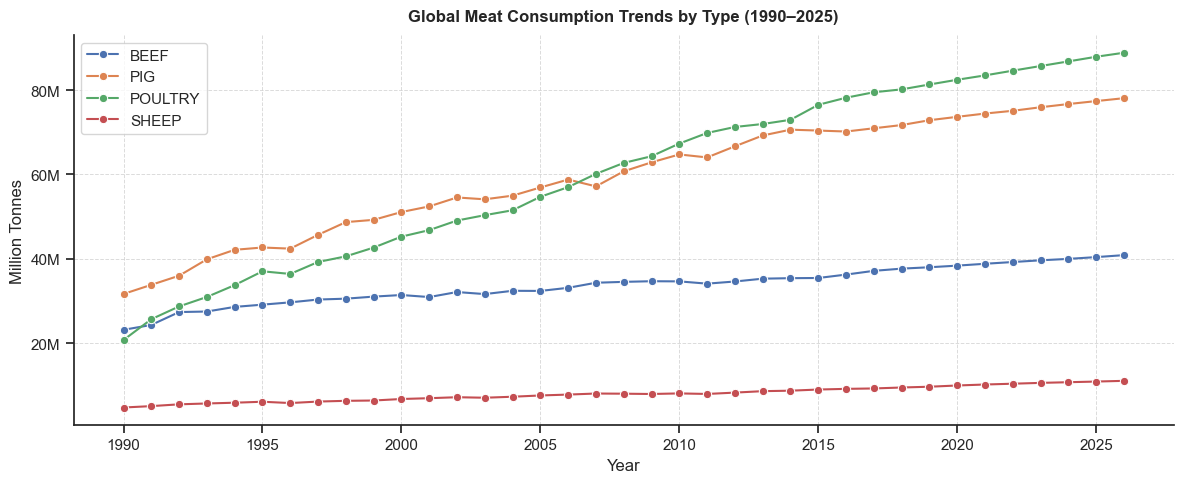

Poultry production experienced the largest growth representing an increase of 328.3%.

Pig and sheep production also showed substantial growth, a rise of 146.6% and 133.5% respectively.

Beef exhibited more moderate and steady growth over the same period, with an increase of 76.5%.


In [601]:
type_grouped = df_filtered.groupby(['YEAR' ,'TYPE'])['TONNE'].sum().reset_index()

plt.figure(figsize=(12, 5))

ax = sns.lineplot(
    type_grouped, 
    x='YEAR', 
    y='TONNE', 
    hue='TYPE', 
    marker='o'
)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}M" if x != 0 else '0'))

plt.title('Global Meat Consumption Trends by Type (1990–2025)', fontsize=12, fontweight="bold", pad=10)
plt.grid(True, linestyle="--", linewidth=0.7, alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Million Tonnes')
plt.legend()
plt.tight_layout()
sns.despine()
plt.show()

def get_min_max(df, type):
    meat_data = df.loc[df['TYPE'] == type, 'TONNE']
    return meat_data.min(), meat_data.max()

print(f"Poultry production experienced the largest growth representing an increase of {(get_min_max(type_grouped, 'POULTRY')[1]/get_min_max(type_grouped, 'POULTRY')[0] - 1)*100:.1f}%.\n\n"
      f"Pig and sheep production also showed substantial growth, a rise of {(get_min_max(type_grouped, 'PIG')[1]/get_min_max(type_grouped, 'PIG')[0] - 1)*100:.1f}% and {(get_min_max(type_grouped, 'SHEEP')[1]/get_min_max(type_grouped, 'SHEEP')[0] - 1)*100:.1f}% respectively.\n\n"
      f"Beef exhibited more moderate and steady growth over the same period, with an increase of {(get_min_max(type_grouped, 'BEEF')[1]/get_min_max(type_grouped, 'BEEF')[0] - 1)*100:.1f}%.")

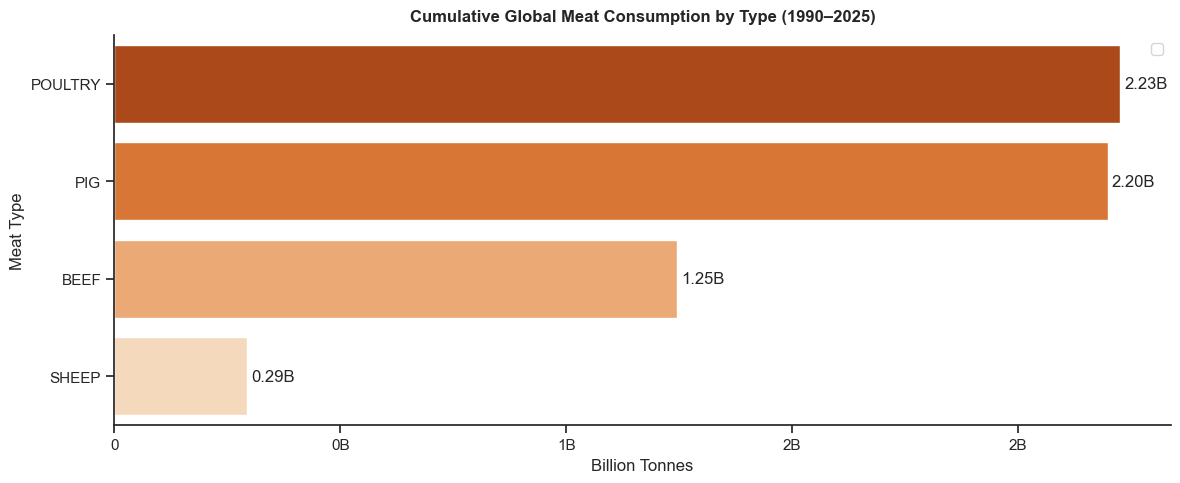

Poultry and pig meat dominate global consumption; beef and sheep play a secondary role.


In [602]:
meat_tonnes = df_filtered.groupby('TYPE')['TONNE'].sum().reset_index().sort_values(by='TONNE', ascending=False)

plt.figure(figsize=(12, 5))

ax = sns.barplot(
    meat_tonnes, 
    x='TONNE', 
    y='TYPE',
    palette='Oranges_r'
)

for container in ax.containers:
    labels = [f"{v.get_width()/1e9:.2f}B" for v in container]
    ax.bar_label(container, labels=labels, padding=3)

ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{x/1e9:.0f}B" if x != 0 else '0'))

plt.title('Cumulative Global Meat Consumption by Type (1990–2025)', fontsize=12, fontweight="bold", pad=10)
plt.xlabel('Billion Tonnes')
plt.ylabel('Meat Type')
plt.legend()
plt.tight_layout()
sns.despine()
plt.show()

print('Poultry and pig meat dominate global consumption; beef and sheep play a secondary role.')

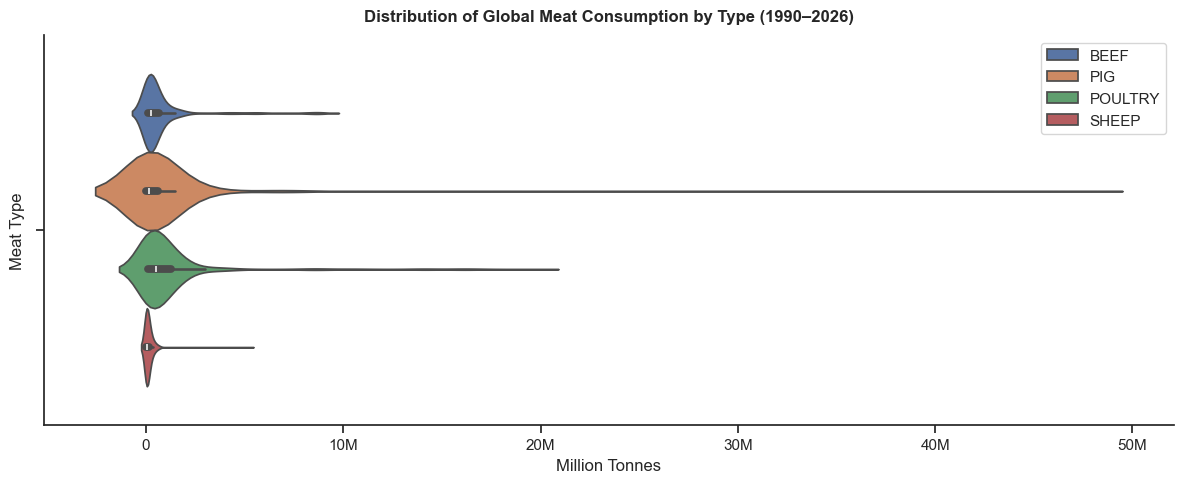

The distributions exhibit strong right-skewness and high dispersion across all meat types, with poultry and pig meat displaying broader upper tails and greater variability in consumption volumes compared to the more tightly concentrated beef and sheep distributions.


In [603]:
plt.figure(figsize=(12, 5))

ax = sns.violinplot(
    df_filtered, 
    x='TONNE',
    hue='TYPE'
)

ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}M" if x != 0 else '0'))

plt.title('Distribution of Global Meat Consumption by Type (1990–2026)', fontsize=12, fontweight="bold", pad=10)
plt.xlabel('Million Tonnes')
plt.ylabel('Meat Type')
plt.legend()
plt.tight_layout()
sns.despine()
plt.show()

print("The distributions exhibit strong right-skewness and high dispersion across all meat types, with poultry and pig meat displaying broader upper tails and greater variability in consumption volumes compared to the more tightly concentrated beef and sheep distributions.")

## Correlation Between Per-Capita Consumption and Total Production in Tonnes
This section shows relationship between average per-person consumption and total production of meat, highlighting how consumption patterns relate to overall output

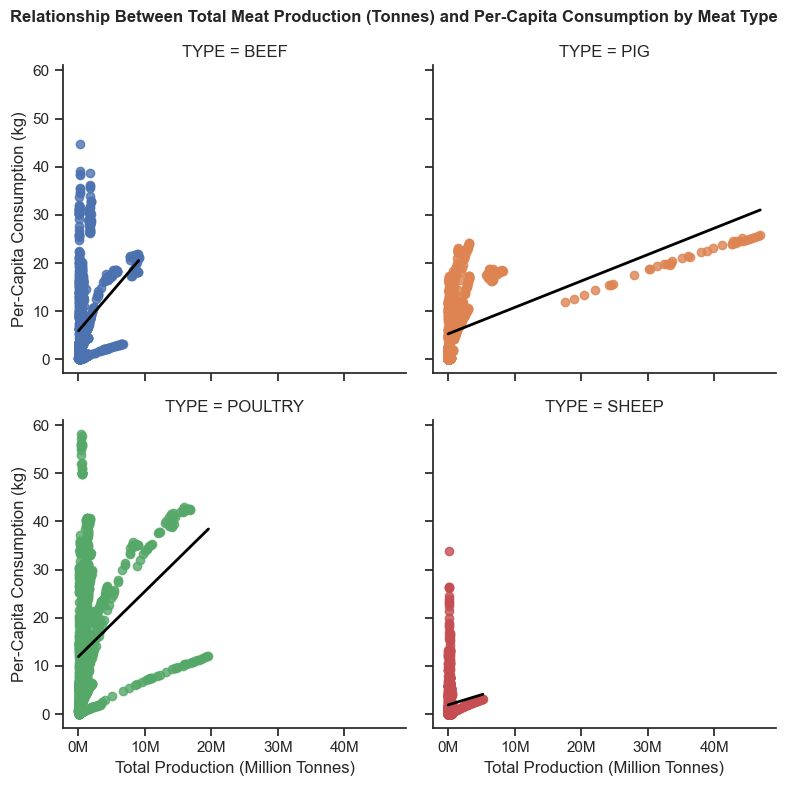

Across all meat types, per-capita consumption increases with total production, but the strength and clarity of this relationship varies markedly by type.
Poultry and pig meat show the most consistent positive association between production scale and per-capita availability, reflecting their role as globally dominant and scalable protein sources.
Beef exhibits greater dispersion, indicating stronger influences from cultural, economic, and production constraints, while sheep meat remains low in both production and per-capita consumption, with a weak relationship between the two.


In [604]:
g = sns.lmplot(
    data=df_filtered,
    x='TONNE',
    y='KG_CAP',
    hue='TYPE',
    col='TYPE',
    col_wrap=2,
    height=4,
    ci=None,
    line_kws={'color': 'black', 'linewidth': 2}
)

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(
        mticker.FuncFormatter(lambda x, pos: f"{x/1e6:.0f}M")
        )

g.fig.suptitle('Relationship Between Total Meat Production (Tonnes) and Per-Capita Consumption by Meat Type', fontsize=12, fontweight="bold")
g.set_axis_labels('Total Production (Million Tonnes)', 'Per-Capita Consumption (kg)')
plt.tight_layout()
sns.despine()
plt.show()

print("Across all meat types, per-capita consumption increases with total production, but the strength and clarity of this relationship varies markedly by type.\nPoultry and pig meat show the most consistent positive association between production scale and per-capita availability, reflecting their role as globally dominant and scalable protein sources.\nBeef exhibits greater dispersion, indicating stronger influences from cultural, economic, and production constraints, while sheep meat remains low in both production and per-capita consumption, with a weak relationship between the two.")

## Analysis of Meat Consumption Trends in Argentina
This section examines long-term trends and dietary patterns in meat consumption in Argentina.

## Hypothesis Testing
This section investigates 